<a href="https://colab.research.google.com/github/AmirHosseinAlikhahMishamandani/Hackerrank/blob/main/HRC_21_matrixRotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hackerrank.com

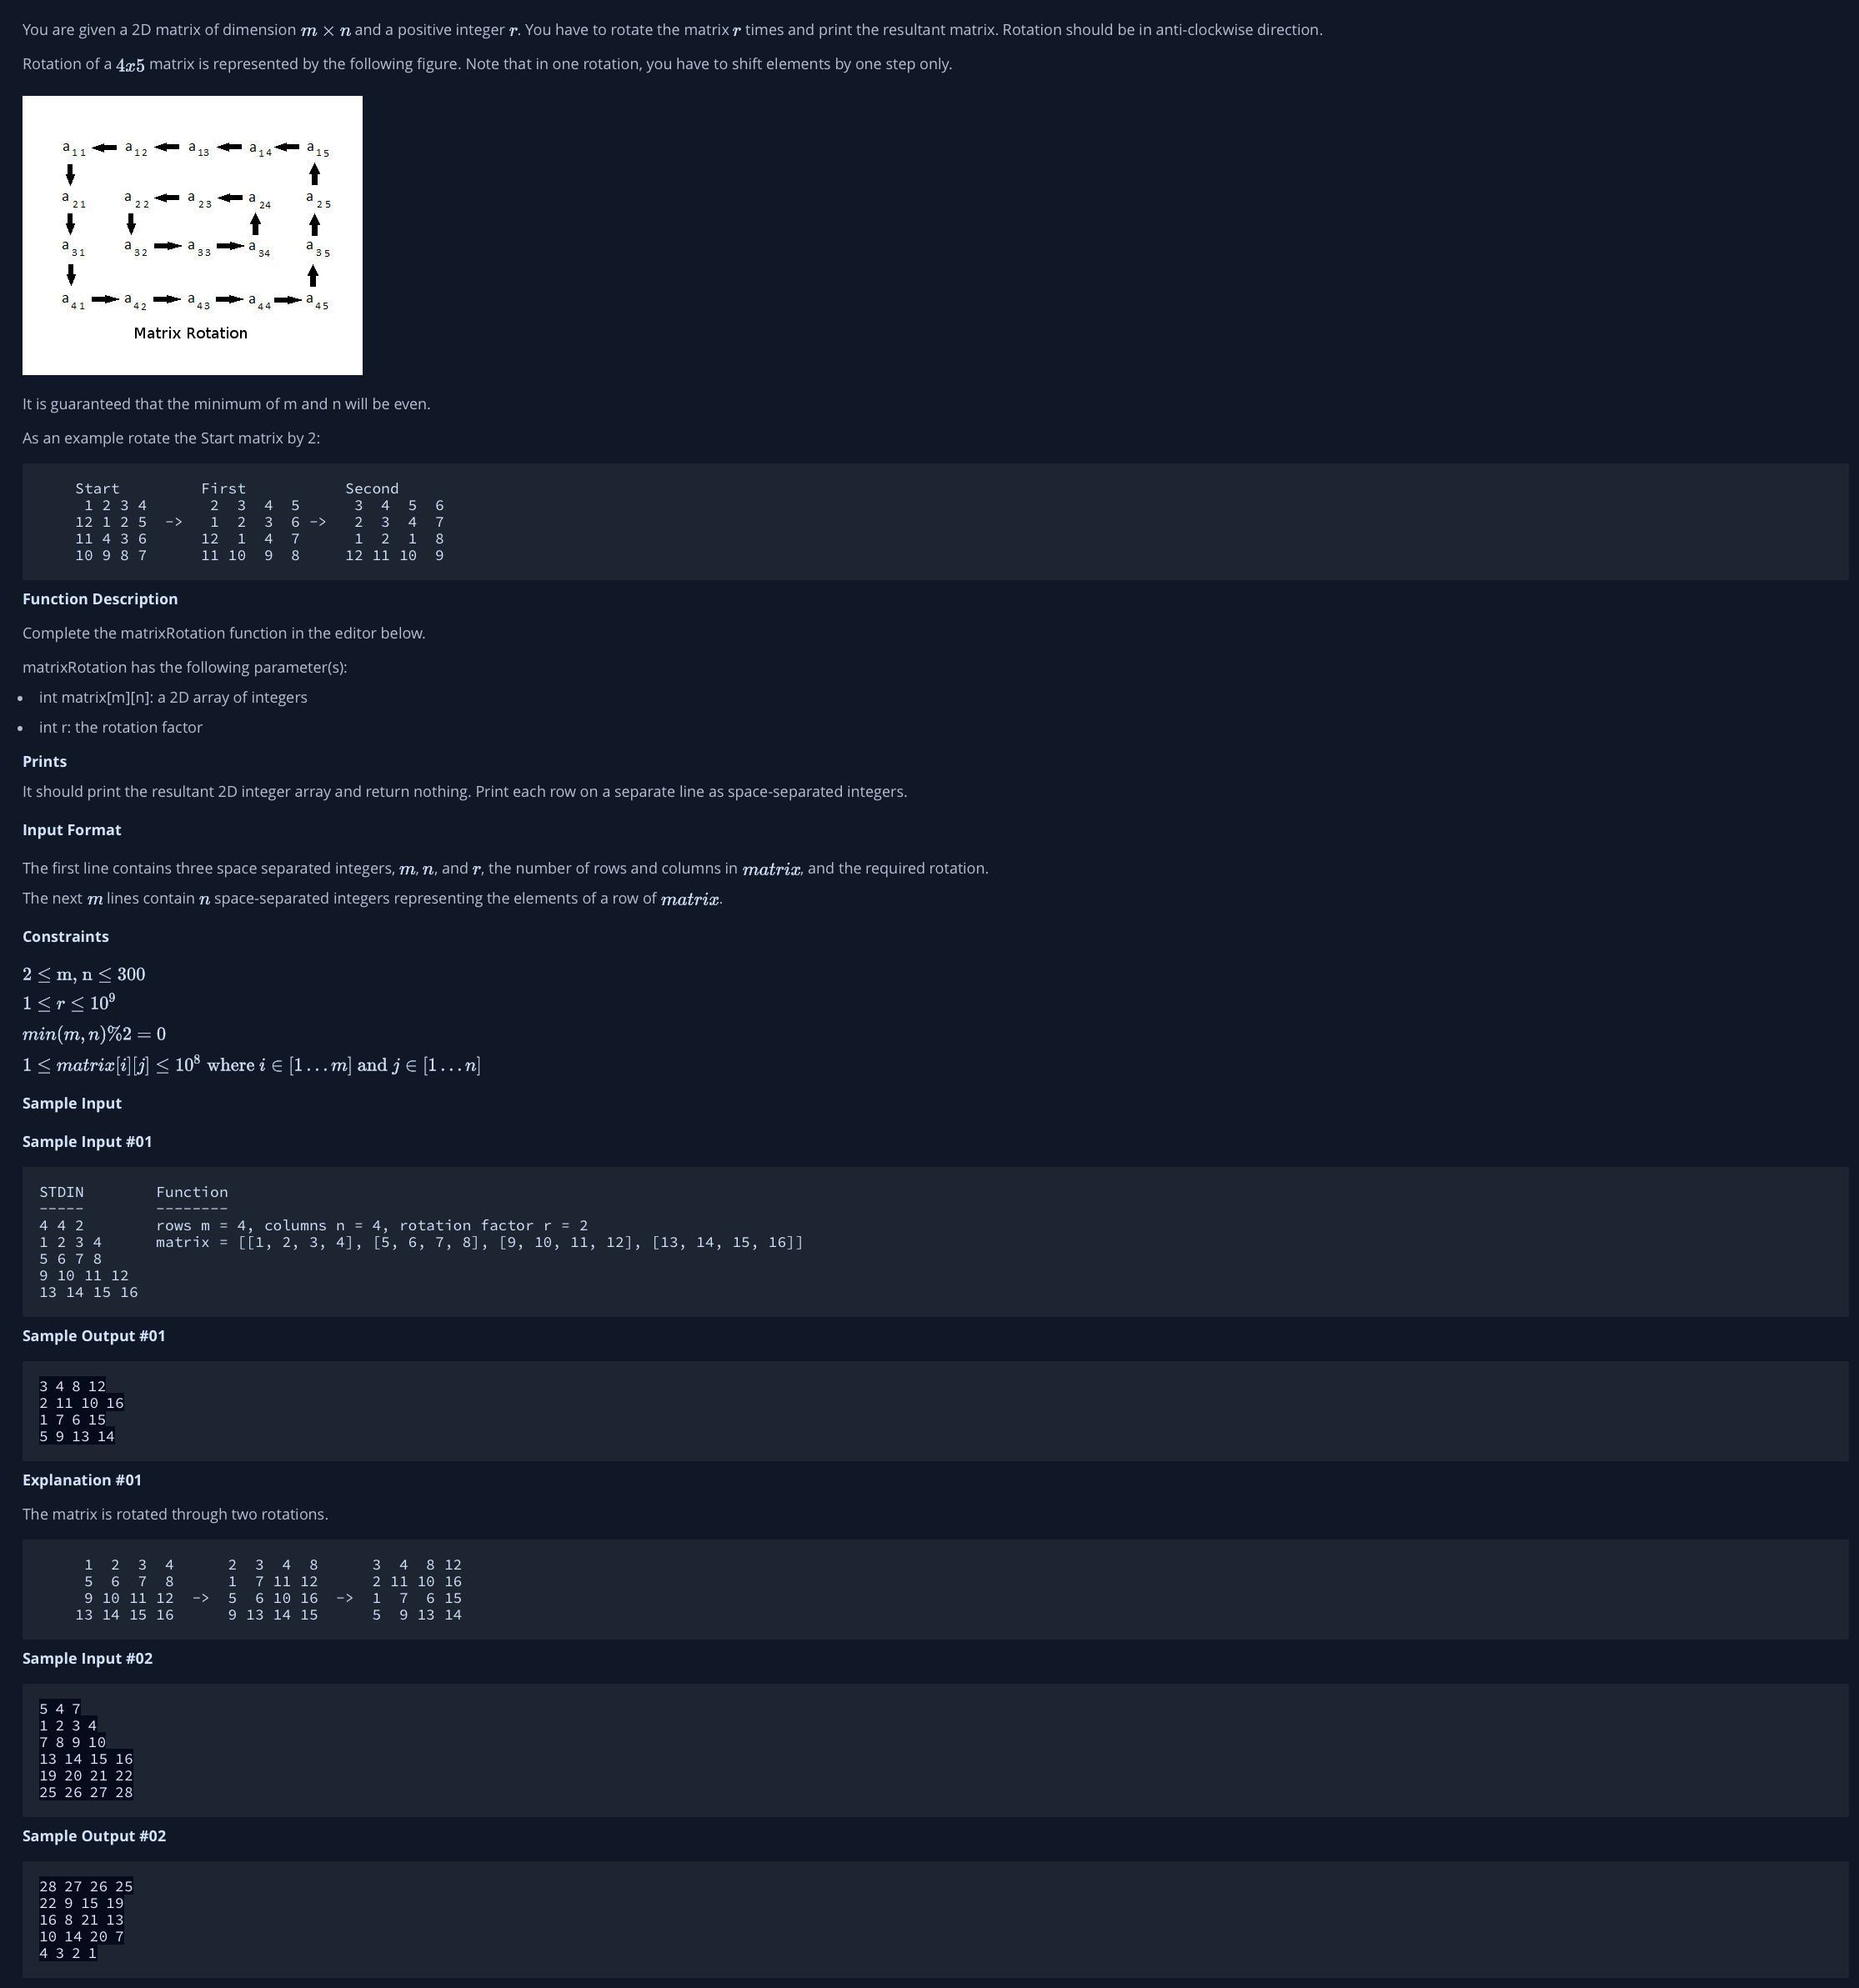
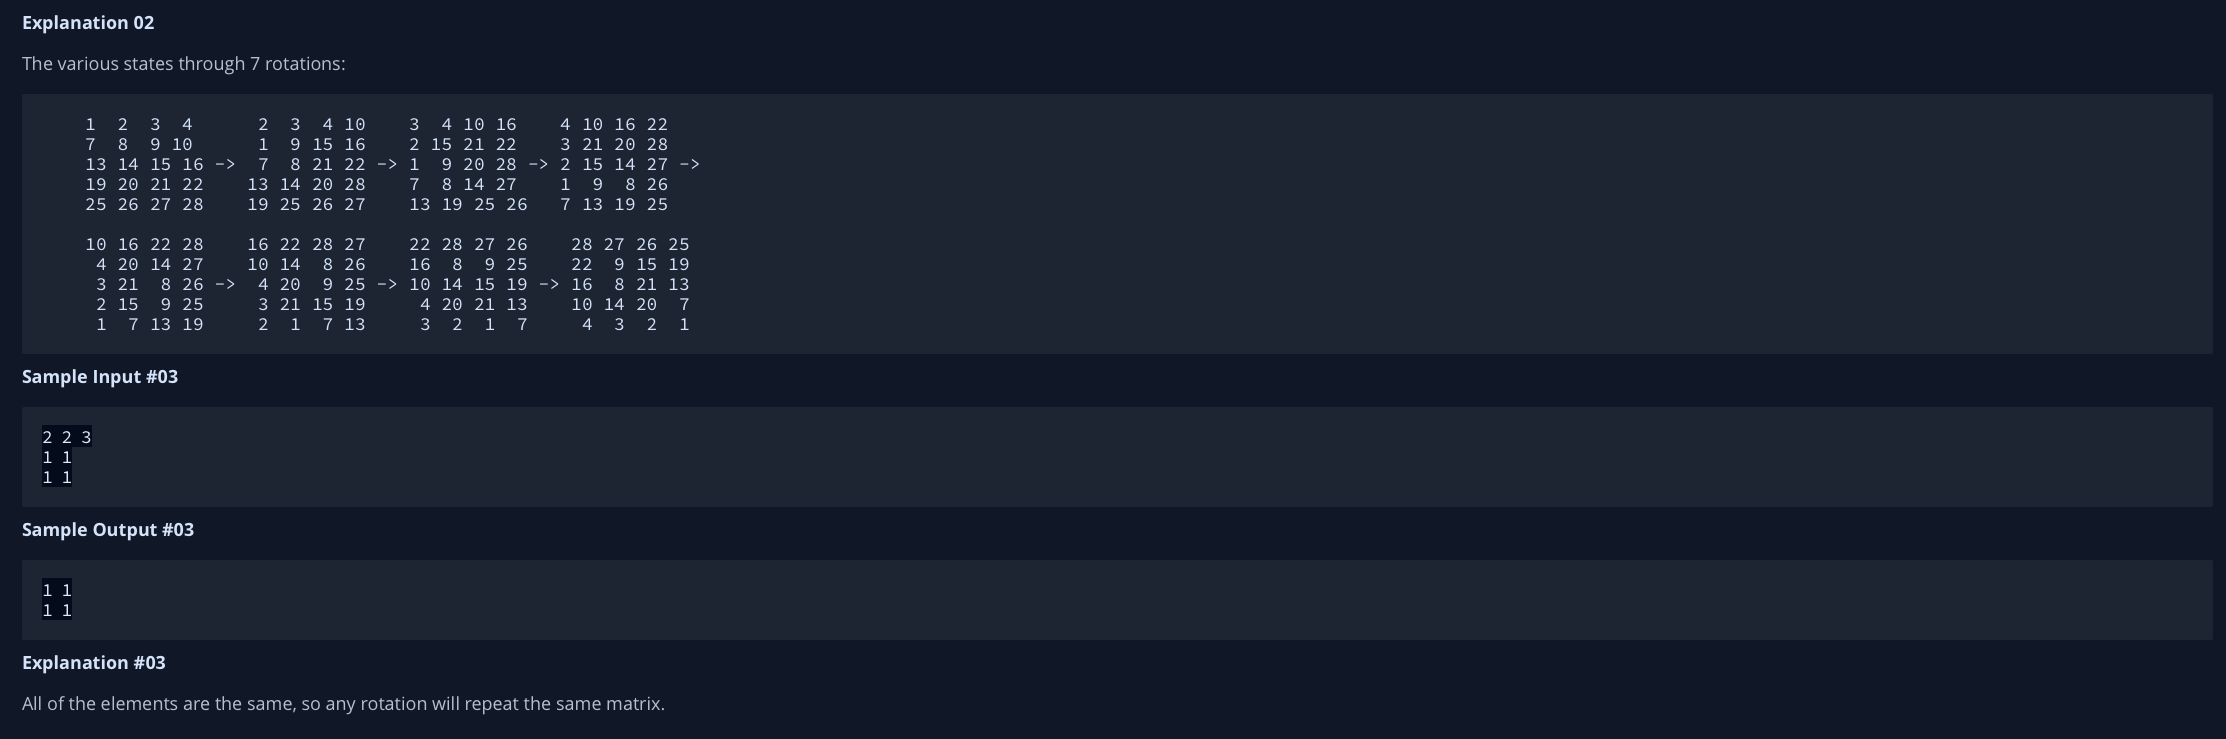

# Solution

In [31]:
def matrixRotation(matrix, r):
    def peel_layer(m):
      if not m or not m[0]:
          return [], []

      top_row = m[0]
      bottom_row = m[-1] if len(m) > 1 else []

      left_col = [row[0] for row in m[1:-1]] if len(m[0]) > 1 else []
      right_col = [row[-1] for row in m[1:-1]] if len(m[0]) > 1 else []

      peeled_layer = top_row + right_col + bottom_row[::-1] + left_col[::-1]
      remaining_matrix = [row[1:-1] for row in m[1:-1]]

      return peeled_layer, remaining_matrix

    def rotate_array_ccw(arr, r):
        n = len(arr)
        r %= n  # Ensure r is within the range of array length
        if r == 0:
            return arr  # No need to rotate if r is 0
        return arr[r:] + arr[:r]

    def reconstruct_matrix(layers, original_shape):
        m, n = original_shape  # dimensions of the original matrix
        new_matrix = [[0] * n for _ in range(m)]  # initialize a matrix with zeros

        row_start, col_start = 0, 0  # starting indices for each layer

        for layer in layers:
            # Define the dimensions of the current layer
            row_end = m - row_start
            col_end = n - col_start
            idx = 0  # index for the elements in the layer

            # Top row
            for col in range(col_start, col_end):
                new_matrix[row_start][col] = layer[idx]
                idx += 1

            # Right column
            for row in range(row_start + 1, row_end - 1):
                new_matrix[row][col_end - 1] = layer[idx]
                idx += 1

            # Bottom row
            if row_start != row_end - 1:  # to handle single row remaining
                for col in range(col_end - 1, col_start - 1, -1):
                    new_matrix[row_end - 1][col] = layer[idx]
                    idx += 1

            # Left column
            if col_start != col_end - 1:  # to handle single column remaining
                for row in range(row_end - 2, row_start, -1):
                    new_matrix[row][col_start] = layer[idx]
                    idx += 1

            # Update the starting indices for the next layer
            row_start += 1
            col_start += 1

        return new_matrix

    def print_matrix(m):
        for row in m:
            print(" ".join(map(str, row)))

    layers = []
    original_shape = (len(matrix), len(matrix[0])) if matrix else (0, 0)

    while matrix:
        layer, matrix = peel_layer(matrix)
        if layer:
            layers.append(layer)

    rotated_layers = [rotate_array_ccw(layer, r) for layer in layers]
    reconstructed_matrix = reconstruct_matrix(rotated_layers, original_shape)

    # Print the reconstructed matrix
    print_matrix(reconstructed_matrix)


# Example usage
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]
r = 2
matrixRotation(matrix, r)


3 6 9
2 5 8
1 4 7
